In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


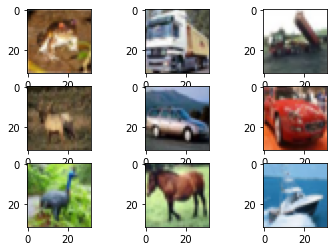

In [4]:
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(colored_train, trainy), (colored_test, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [5]:
colored_train.shape #this is actually our output

(50000, 32, 32, 3)

In [6]:
colored_test.shape #this is for the testing

(10000, 32, 32, 3)

In [14]:
grayscale_train = []
grayscale_test = []

import cv2
for i in range(50000):
    img = cv2.cvtColor(colored_train[i], cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    grayscale_train.append(img)

for i in range(10000):
    img = cv2.cvtColor(colored_test[i], cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    grayscale_test.append(img)

grayscale_train = np.array(grayscale_train)
grayscale_test = np.array(grayscale_test)
print(grayscale_train.shape, grayscale_test.shape) 

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [15]:
from keras import Sequential, layers

In [16]:
ae = Sequential()
ae.add(layers.Conv2D(32,(2,2),input_shape=[32,32,3], kernel_initializer = 'he_normal',padding = "same",use_bias = True))
ae.add(layers.BatchNormalization())
ae.add(layers.ReLU())
#
ae.add(layers.Conv2D(64,(2,2),kernel_initializer = 'he_normal',padding = "same",use_bias = True))
ae.add(layers.BatchNormalization())
ae.add(layers.ReLU())
#
ae.add(layers.Conv2D(128,(2,2),kernel_initializer = 'he_normal',padding = "same",use_bias = True))
ae.add(layers.BatchNormalization())
ae.add(layers.ReLU())

ae.add(layers.Conv2D(256,(2,2),kernel_initializer = 'he_normal',padding = "same",use_bias = True))
ae.add(layers.BatchNormalization())
ae.add(layers.ReLU())

ae.add(layers.Conv2DTranspose(128,(2,2),padding = "same",use_bias = True))
ae.add(layers.ReLU())
#
ae.add(layers.Conv2DTranspose(64,(2,2),padding = "same",use_bias = True))
ae.add(layers.ReLU())
#
ae.add(layers.Conv2DTranspose(32,(2,2),padding = "same",use_bias = True))
ae.add(layers.ReLU())
#
ae.add(layers.Conv2DTranspose(3,(2,2),padding = "same",use_bias = True))
ae.add(layers.ReLU())

ae.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_16 (ReLU)              (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        8256      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
re_lu_17 (ReLU)              (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 128)      

In [17]:
ae.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

In [18]:
ae.fit(grayscale_train, colored_train, epochs=20)

Epoch 1/20


2022-09-07 15:36:14.673543: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1563/1563 [==============================] - 39s 20ms/step - loss: 719.2653 - accuracy: 0.4461
Epoch 2/20
1563/1563 [==============================] - 31s 20ms/step - loss: 417.5572 - accuracy: 0.4890
Epoch 3/20
1563/1563 [==============================] - 31s 20ms/step - loss: 399.5272 - accuracy: 0.4950
Epoch 4/20
1563/1563 [==============================] - 31s 20ms/step - loss: 382.2334 - accuracy: 0.4967
Epoch 5/20
1563/1563 [==============================] - 31s 20ms/step - loss: 372.3655 - accuracy: 0.4985
Epoch 6/20
1563/1563 [==============================] - 31s 20ms/step - loss: 366.0967 - accuracy: 0.5008
Epoch 7/20
1563/1563 [==============================] - 31s 20ms/step - loss: 363.0166 - accuracy: 0.5023
Epoch 8/20
1563/1563 [==============================] - 31s 20ms/step - loss: 357.9939 - accuracy: 0.5040
Epoch 9/20
1563/1563 [==============================] - 31s 20ms/step - loss: 355.3113 - accuracy: 0.5048
Epoch 10/20
1563/1563 [==============================] - 

In [19]:
preds = ae.predict(grayscale_test)
preds.shape


(10000, 32, 32, 3)

In [23]:
preds = preds.astype("uint8")

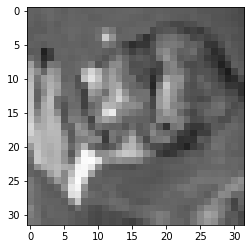

In [21]:
pyplot.imshow(grayscale_test[0])

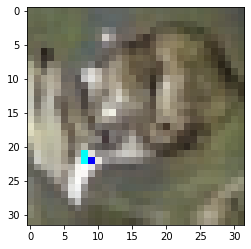

In [24]:
pyplot.imshow(preds[0])

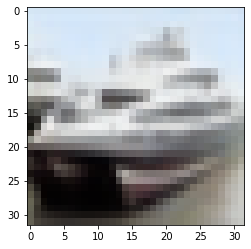

In [25]:
pyplot.imshow(preds[1])

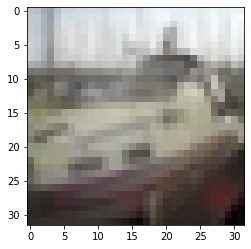

In [26]:
pyplot.imshow(preds[2])

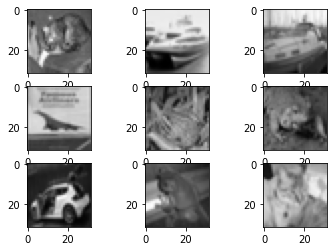

In [27]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(grayscale_test[i])
# show the figure
pyplot.show()

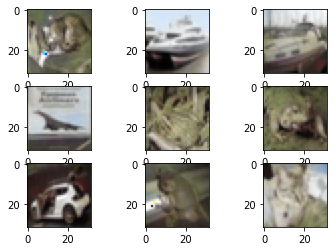

In [28]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(preds[i])
# show the figure
pyplot.show()